# WeatherPy

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import date
import function as fun

# # Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# build URL to make API call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create the Lists to be used in the Dictionary for the Data Frame
name = []
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
counter = 0

# Loop through the entire list of cities and request data for each city
for city in cities:
    try:
        city_response = requests.get(query_url + city).json()
        name.append(city_response['name'])
        clouds.append(city_response['clouds']['all'])
        country.append(city_response['sys']['country'])
        date.append(city_response['dt'])
        humidity.append(city_response['main']['humidity'])
        lat.append(city_response['coord']['lat'])
        lng.append(city_response['coord']['lon'])
        max_temp.append(city_response['main']['temp_max'])
        wind_speed.append(city_response['wind']['speed'])
        counter += 1
        print(f"Processing Request {counter} | {city}")
        time.sleep(2)
    except Exception:
        print(f"City not found -- Skipping: {city}")

Processing Request 1 | ponta delgada
Processing Request 2 | rikitea
Processing Request 3 | lebu
Processing Request 4 | korla
Processing Request 5 | isangel
Processing Request 6 | georgetown
Processing Request 7 | hermanus
Processing Request 8 | new norfolk
Processing Request 9 | noumea
Processing Request 10 | punta arenas
Processing Request 11 | bluefield
Processing Request 12 | ambilobe
Processing Request 13 | natal
Processing Request 14 | muisne
Processing Request 15 | victoria
Processing Request 16 | anloga
Processing Request 17 | bontang
Processing Request 18 | wadi musa
Processing Request 19 | zacualpan
Processing Request 20 | bredasdorp
Processing Request 21 | mataura
Processing Request 22 | kapaa
City not found -- Skipping: mys shmidta
Processing Request 23 | bluff
City not found -- Skipping: barentsburg
Processing Request 24 | atuona
Processing Request 25 | ambon
Processing Request 26 | gat
Processing Request 27 | saint george
Processing Request 28 | broken hill
Processing Requ

Processing Request 217 | whitehorse
Processing Request 218 | markova
Processing Request 219 | yerbogachen
Processing Request 220 | chimoio
City not found -- Skipping: sentyabrskiy
Processing Request 221 | sangin
Processing Request 222 | yumen
City not found -- Skipping: viligili
Processing Request 223 | kastamonu
City not found -- Skipping: kadykchan
Processing Request 224 | ravar
Processing Request 225 | hambantota
Processing Request 226 | mahenge
Processing Request 227 | grand gaube
Processing Request 228 | coquimbo
Processing Request 229 | christchurch
Processing Request 230 | tahta
Processing Request 231 | baley
Processing Request 232 | sinnamary
Processing Request 233 | talas
City not found -- Skipping: formoso do araguaia
Processing Request 234 | aqtobe
Processing Request 235 | acapulco
City not found -- Skipping: palabuhanratu
Processing Request 236 | obzor
Processing Request 237 | esperance
Processing Request 238 | tual
Processing Request 239 | brae
Processing Request 240 | guc

Processing Request 442 | tabou
Processing Request 443 | chenghai
Processing Request 444 | tuy hoa
Processing Request 445 | ancud
Processing Request 446 | taoudenni
Processing Request 447 | belmonte
Processing Request 448 | garowe
City not found -- Skipping: alotau
Processing Request 449 | abu samrah
City not found -- Skipping: barawe
Processing Request 450 | maragogi
Processing Request 451 | berdigestyakh
Processing Request 452 | praya
Processing Request 453 | sai buri
Processing Request 454 | petropavlovsk-kamchatskiy
Processing Request 455 | beringovskiy
Processing Request 456 | quemado de guines
Processing Request 457 | inhambane
Processing Request 458 | fallon
Processing Request 459 | seddon
Processing Request 460 | sibolga
Processing Request 461 | polasara
Processing Request 462 | saint-augustin
Processing Request 463 | tiarei
Processing Request 464 | uige
Processing Request 465 | mackenzie
Processing Request 466 | shenjiamen
Processing Request 467 | nuuk
Processing Request 468 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create & display dataframe based on weather attributes 
city_list = pd.DataFrame(
    {'City': name,
     'Cloudiness': clouds,
     'Country': country,
     'Date': date,
     'Humidity': humidity,
     'Lat': lat,
     'Lng': lng,
     'Max Temp': max_temp,
     'Wind Speed': wind_speed})
     
city_list.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ponta Delgada,20,PT,1584214889,72,37.73,-25.67,60.80,13.87
1,Rikitea,0,PF,1584214891,80,-23.12,-134.97,77.67,13.69
2,Lebu,0,CL,1584214893,54,-37.62,-73.65,62.87,13.24
3,Korla,100,CN,1584214895,59,41.76,86.15,39.99,1.57
4,Isangel,75,VU,1584214897,78,-19.55,169.27,82.40,12.75


In [6]:
# load new df to csv
city_list.to_csv(r'~/Desktop/RiceData/Homework/python-api-challenge/Instructions/starter_code/city_list.csv', index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

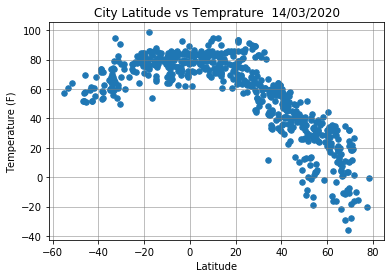

In [13]:
# create Lat vs. Temp correlation scatter plot
today_dt = time.strftime("%d/%m/%Y")
title = "City Latitude vs Temprature" + "  "+ today_dt
temp_plot = city_list.plot.scatter(x='Lat',
                      y='Max Temp',s=30,title=title)
temp_plot.set_ylabel("Temperature (F)")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/lat_temp.png')

#### Latitude vs. Humidity Plot

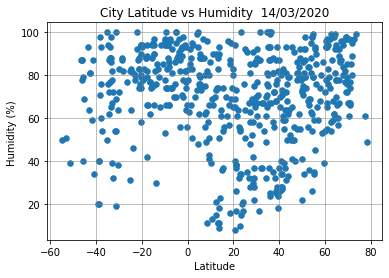

In [14]:
# create Lat vs. Humidity correlation scatter plot
title = "City Latitude vs Humidity" + "  "+ today_dt
temp_plot = city_list.plot.scatter(x='Lat',
                      y='Humidity',s=30,title=title)
temp_plot.set_ylabel("Humidity (%) ")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/lat_humidity.png')

#### Latitude vs. Cloudiness Plot

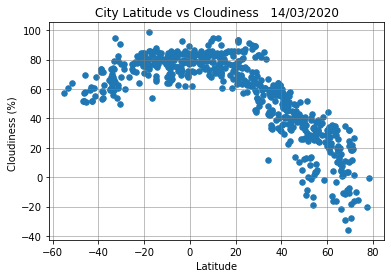

In [15]:
# create Lat vs. Cloudiness scatter plot
title = "City Latitude vs Cloudiness " + "  "+ today_dt
temp_plot = city_list.plot.scatter(x='Lat',
                      y='Max Temp',s=30,title=title)
temp_plot.set_ylabel("Cloudiness (%) ")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/lat_clouds.png')

#### Latitude vs. Wind Speed Plot

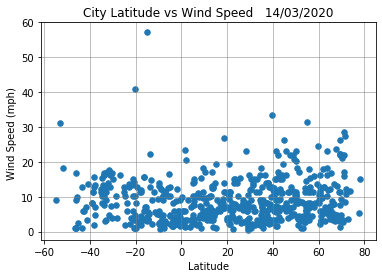

In [16]:
# create Lat vs. Wind Speed scatter plot
title = "City Latitude vs Wind Speed " + "  "+ today_dt
temp_plot = city_list.plot.scatter(x='Lat',
                      y='Wind Speed',s=30,title=title)
temp_plot.set_ylabel("Wind Speed (mph) ")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/lat_windspeed.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
# create data set for northern & southern hemispheres 

# northern hemisphere > 0
north_hemi = city_list.loc[city_list['Lat'] > 0 ]

# southern hemisphere < 0
south_hemi = city_list.loc[city_list['Lat'] < 0 ]

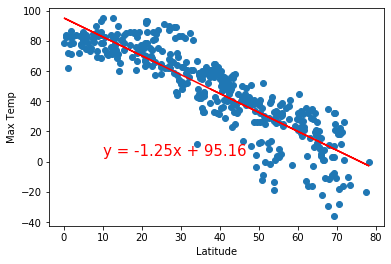

<Figure size 432x288 with 0 Axes>

In [44]:
# create linear regressions for Northern Hemisphere - Max Temp vs. Latitude
x_values = north_hemi['Lat']
y_values = north_hemi['Max Temp']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')

# output to png
fig1 = plt.gcf()
plt.draw()
fig1.savefig("Output_Data/N_maxtemp_lat.png", dpi = 50)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

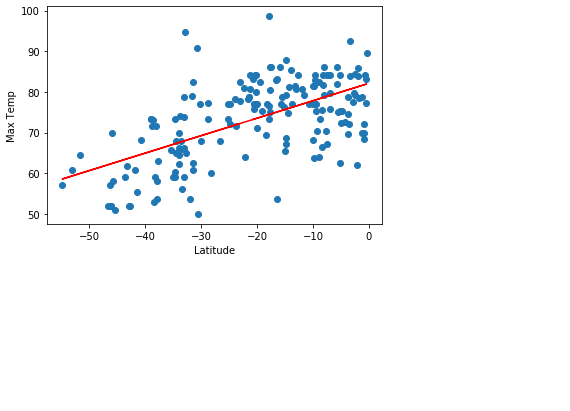

<Figure size 432x288 with 0 Axes>

In [45]:
# create linear regressions for Max Temp vs. Latitude Linear Regression
x_values = south_hemi['Lat']
y_values = south_hemi['Max Temp']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')

# out to png
fig1 = plt.gcf()
plt.draw()
fig1.savefig("Output_Data/S_maxtemp_lat.png", dpi = 50)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

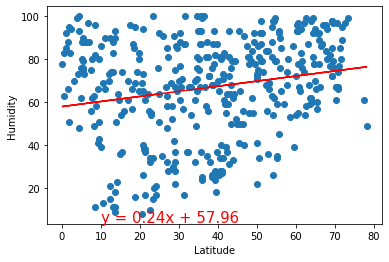

<Figure size 432x288 with 0 Axes>

In [46]:
# create linear regressions for Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = north_hemi['Lat']
y_values = north_hemi['Humidity']
fun.Lin_Reg(x_values,y_values,'Latitude','Humidity')

# output to png
fig1 = plt.gcf()
plt.draw()
fig1.savefig("Output_Data/N_maxtemp_humidity.png", dpi = 50)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

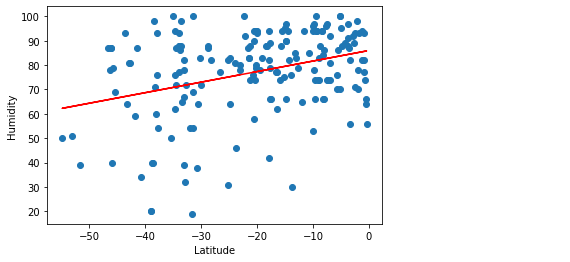

<Figure size 432x288 with 0 Axes>

In [47]:
# create linear regressions for Southern Hemisphere - Humidity (%) vs. Latitude
x_values = south_hemi['Lat']
y_values = south_hemi['Humidity']
fun.Lin_Reg(x_values,y_values,'Latitude','Humidity')

# output to png
fig1 = plt.gcf()
plt.draw()
fig1.savefig("Output_Data/S_humidity_lat.png", dpi = 50)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

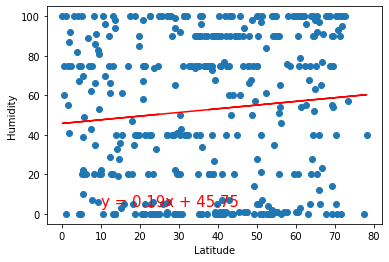

<Figure size 432x288 with 0 Axes>

In [48]:
# create linear regressions for Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = north_hemi['Lat']
y_values = north_hemi['Cloudiness']
fun.Lin_Reg(x_values,y_values,'Latitude','Humidity')

# output to png
fig1 = plt.gcf()
plt.draw()
fig1.savefig("Output_Data/N_cloudy_lat.png", dpi = 50)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

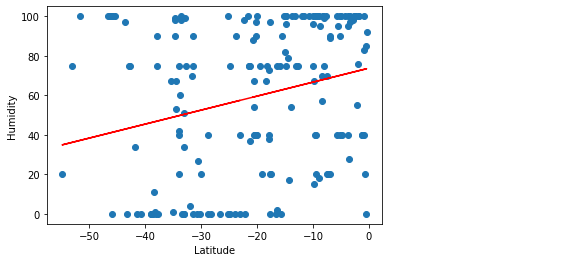

<Figure size 432x288 with 0 Axes>

In [49]:
# create linear regressions for Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = south_hemi['Lat']
y_values = south_hemi['Cloudiness']
fun.Lin_Reg(x_values,y_values,'Latitude','Humidity')

# output to png
fig1 = plt.gcf()
plt.draw()
fig1.savefig("Output_Data/S_cloudy_lat.png", dpi = 50)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

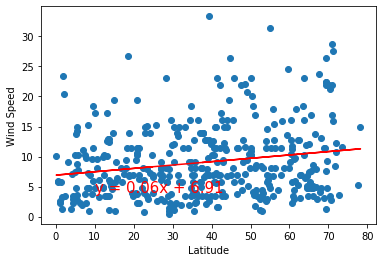

<Figure size 432x288 with 0 Axes>

In [50]:
# create linear regressions for Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = north_hemi['Lat']
y_values = north_hemi['Wind Speed']
fun.Lin_Reg(x_values,y_values,'Latitude','Wind Speed')

# output to png
fig1 = plt.gcf()
plt.draw()
fig1.savefig("Output_Data/N_windspeed_lat.png", dpi = 50)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

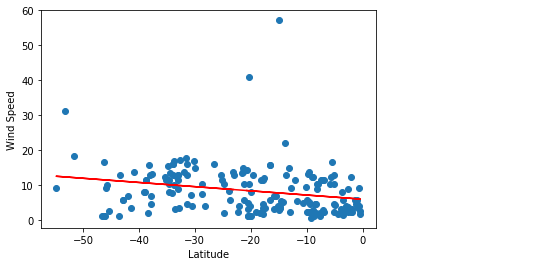

<Figure size 432x288 with 0 Axes>

In [51]:
# create linear regressions for Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = south_hemi['Lat']
y_values = south_hemi['Wind Speed']
fun.Lin_Reg(x_values,y_values,'Latitude','Wind Speed')

# output to png
fig1 = plt.gcf()
plt.draw()
fig1.savefig("Output_Data/S_windspeed_lat.png", dpi = 50)